In [ ]:
import os
import glob
import numpy as np
from collections import Counter

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras_preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.models import  Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D, BatchNormalization, Concatenate
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import model_from_json
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

In [ ]:
from tensorflow.keras.applications import ResNet50
#Load the ResNet50 model
ResNet50_conv = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

for layer in ResNet50_conv.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in ResNet50_conv.layers:
    print(layer, layer.trainable)

# Create the model
model = models.Sequential()
# Add the vgg convolutional base model
model.add(ResNet50_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(15, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

94781440/94765736 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7fbd40e6c950> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fbcea402650> True
<keras.layers.convolutional.Conv2D object at 0x7fbcea402810> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbce9b70d90> True
<keras.layers.core.Activation object at 0x7fbce9b364d0> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fbce632eb90> True
<keras.layers.pooling.MaxPooling2D object at 0x7fbce6342f90> True
<keras.layers.convolutional.Conv2D object at 0x7fbce6349d10> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbce62dbf90> True
<keras.layers.core.Activation object at 0x7fbce62e65d0> True
<keras.layers.convolutional.Conv2D object at 0x7fbce62e2110> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbce6342950> True
<keras.layers.core.Activation object at 0

In [ ]:
 # Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-7)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

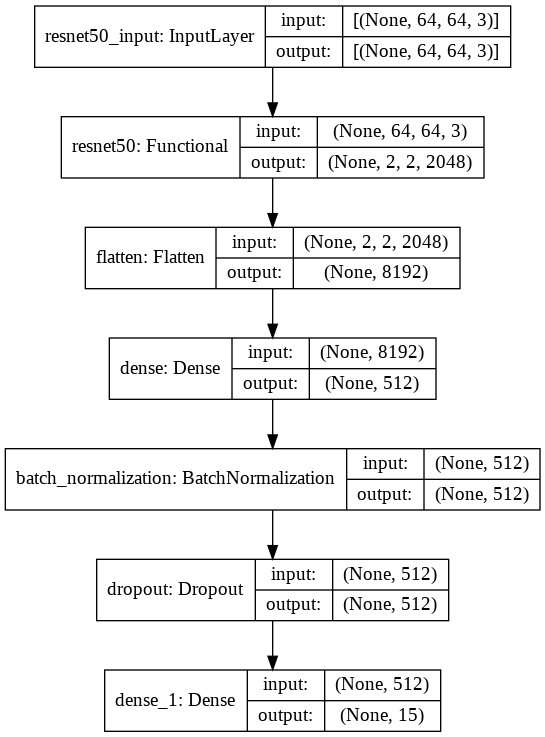

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [ ]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/melspec8_1/train/',
                                                 target_size = (64, 64),
                                                 shuffle=True)

Found 10813 images belonging to 15 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/melspec8_1/val/',
                                            target_size = (64, 64), shuffle=False)

Found 1319 images belonging to 15 classes.


In [ ]:
model_history = model.fit(training_set, batch_size=16, epochs=11, verbose=1, validation_data=(test_set))

Epoch 1/11
338/338 [==============================] - 2436s 7s/step - loss: 2.2383 - accuracy: 0.4138 - val_loss: 3.4369 - val_accuracy: 0.1001
Epoch 2/11
338/338 [==============================] - 1573s 5s/step - loss: 1.2570 - accuracy: 0.6282 - val_loss: 3.9521 - val_accuracy: 0.1107
Epoch 3/11
338/338 [==============================] - 1603s 5s/step - loss: 0.9378 - accuracy: 0.7179 - val_loss: 2.2886 - val_accuracy: 0.3707
Epoch 4/11
338/338 [==============================] - 1590s 5s/step - loss: 0.7602 - accuracy: 0.7765 - val_loss: 1.2846 - val_accuracy: 0.6444
Epoch 5/11
338/338 [==============================] - 1580s 5s/step - loss: 0.6544 - accuracy: 0.8072 - val_loss: 1.3219 - val_accuracy: 0.6649
Epoch 6/11
338/338 [==============================] - 1614s 5s/step - loss: 0.5209 - accuracy: 0.8372 - val_loss: 1.4107 - val_accuracy: 0.6520
Epoch 7/11
338/338 [==============================] - 1683s 5s/step - loss: 0.4488 - accuracy: 0.8613 - val_loss: 1.2266 - val_accuracy:

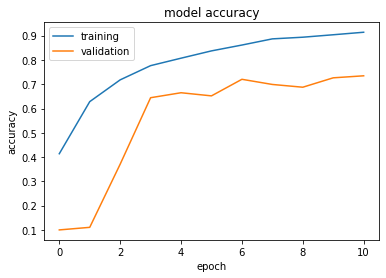

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

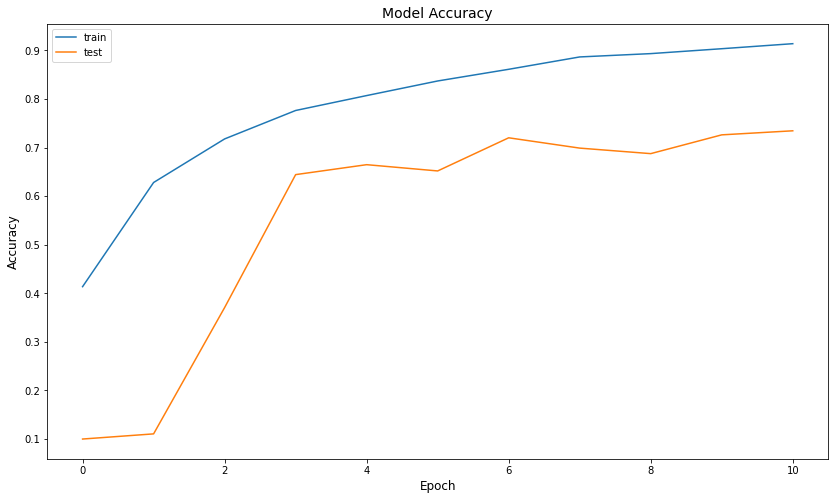

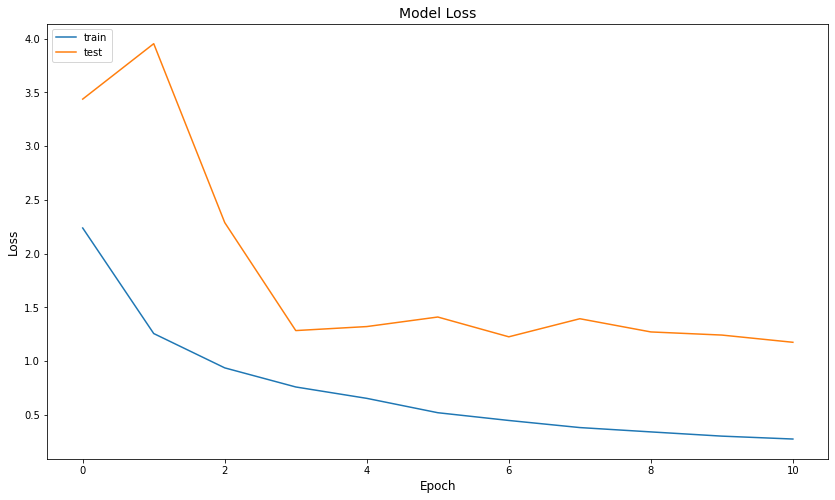

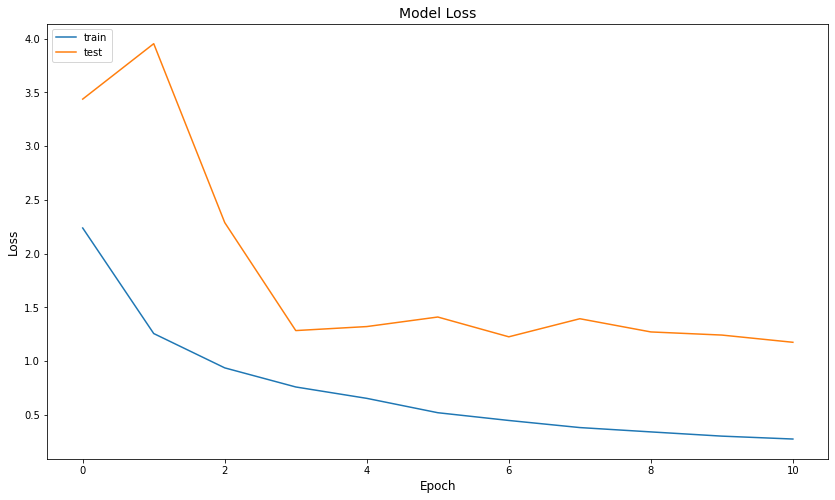

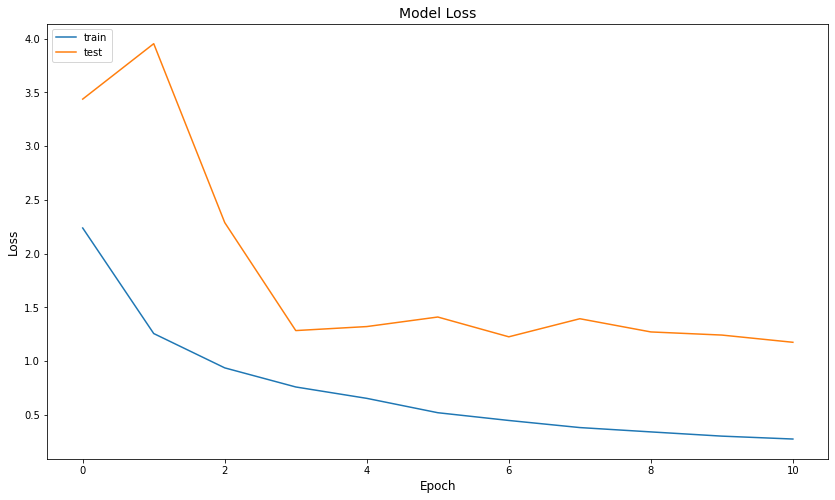

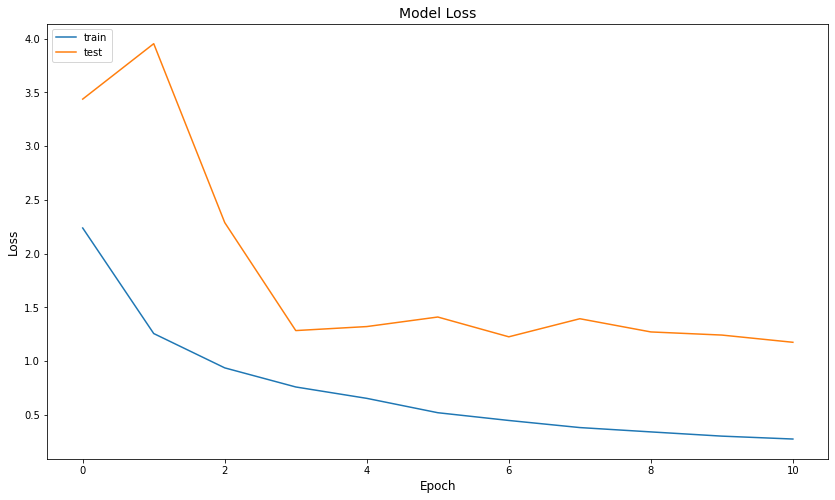

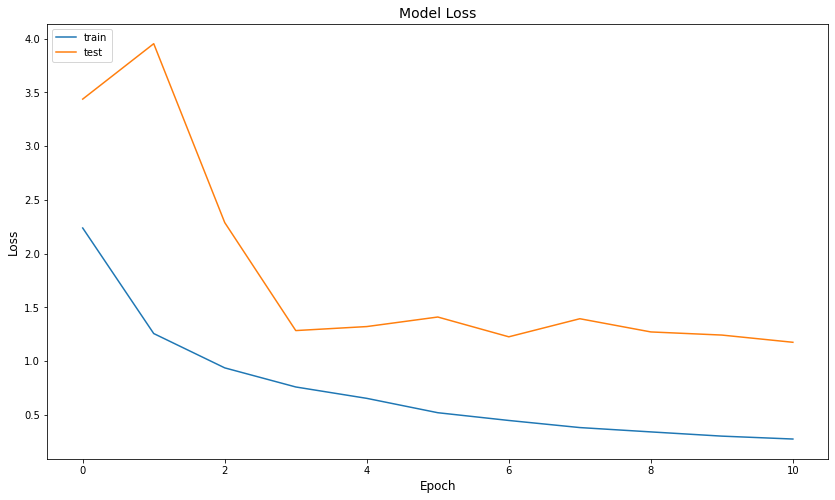

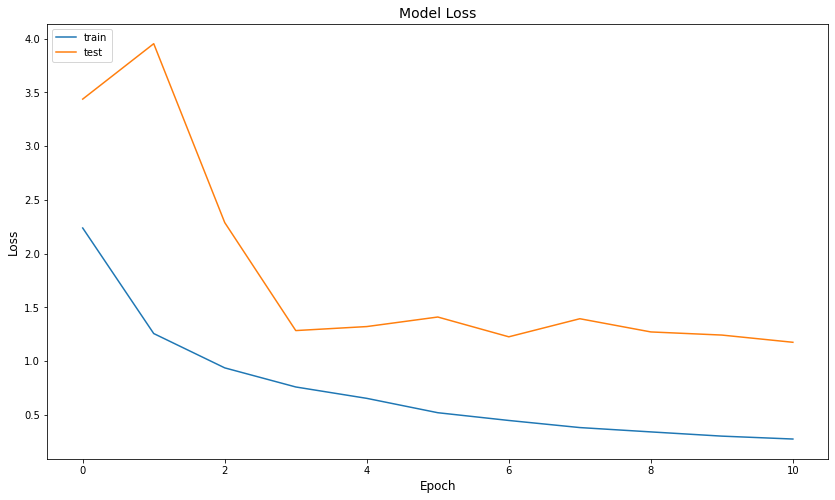

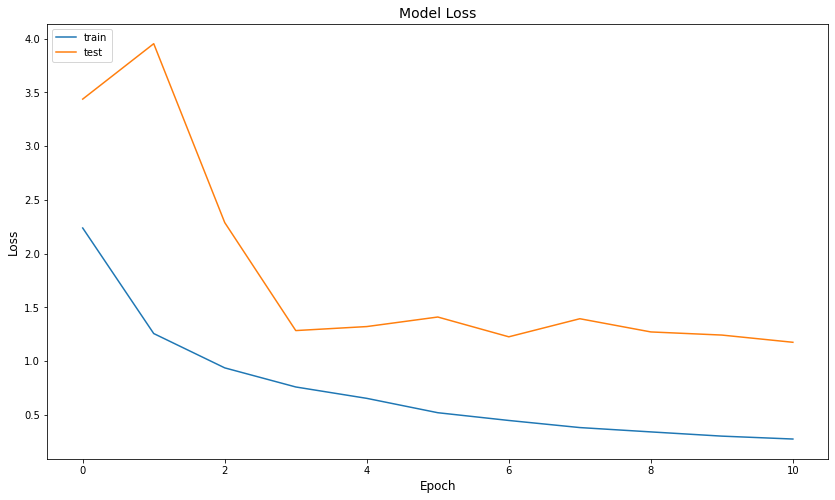

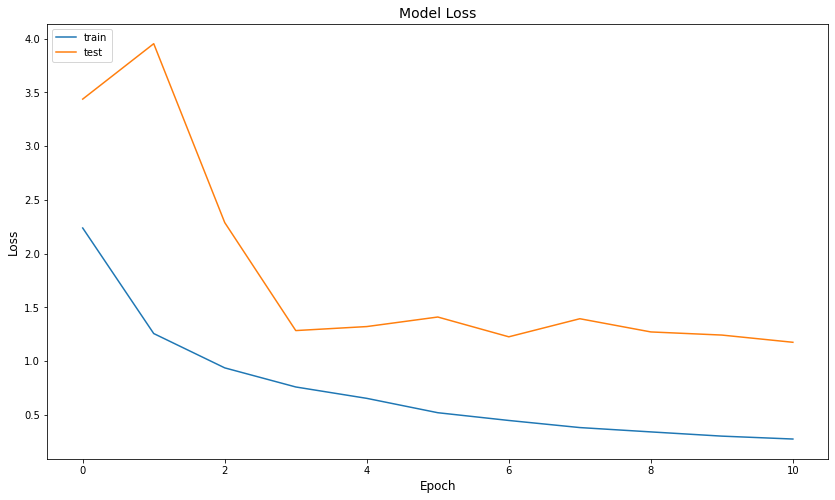

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
target_names = []
for key in training_set.class_indices:
  target_names.append(key)

print(target_names)

['0Dryoc', '10Pycno', '11Corvu', '12Elanu', '13Anthr', '14Dicru', '1Capri', '2Pnoep', '3Malac', '4Anthi', '5Ortho', '6Pycno', '7Malac', '8Malac', '9Pachy']


In [ ]:
target_names1 = []
for key in test_set.class_indices:
  target_names.append(key)

print(target_names1)

[]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


Confusion Matrix


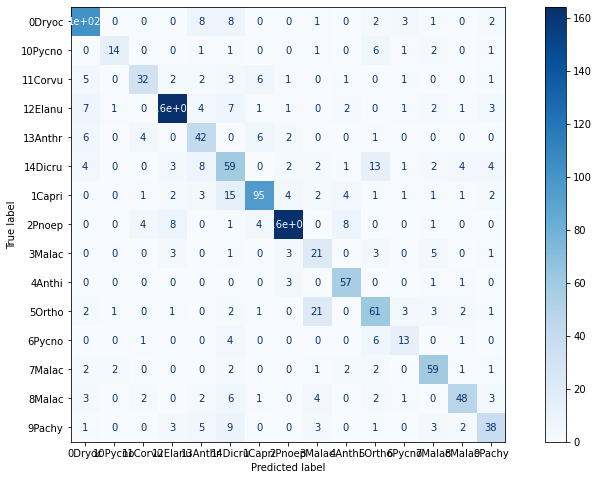

In [ ]:
#plt.figure(figsize=(14,8))
Y_pred = model.predict(test_set)
y_pred1 = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred1)
#cm1 =plot_confusion_matrix(confusion_matrix=cm, target_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
f, ax = plt.subplots(figsize=(14,8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()
#cm1.ax_.set_title('Confusion Matrix')

In [ ]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred1, target_names=target_names ))

Classification Report
              precision    recall  f1-score   support

      0Dryoc       0.77      0.80      0.79       127
     10Pycno       0.78      0.52      0.62        27
     11Corvu       0.73      0.59      0.65        54
     12Elanu       0.88      0.85      0.86       194
     13Anthr       0.56      0.69      0.62        61
     14Dicru       0.50      0.57      0.53       103
      1Capri       0.83      0.72      0.77       132
      2Pnoep       0.91      0.86      0.89       190
      3Malac       0.38      0.57      0.45        37
      4Anthi       0.76      0.92      0.83        62
      5Ortho       0.62      0.62      0.62        98
      6Pycno       0.52      0.52      0.52        25
      7Malac       0.74      0.82      0.78        72
      8Malac       0.79      0.67      0.72        72
      9Pachy       0.67      0.58      0.62        65

    accuracy                           0.73      1319
   macro avg       0.70      0.69      0.69      1319
weig

42/42 [==============================] - 23s 533ms/step - loss: 1.1757 - accuracy: 0.7346
n Test_Accuracy:- 0.7346474528312683
confusion matrix
[[102   0   0   0   8   8   0   0   1   0   2   3   1   0   2]
 [  0  14   0   0   1   1   0   0   1   0   6   1   2   0   1]
 [  5   0  32   2   2   3   6   1   0   1   0   1   0   0   1]
 [  7   1   0 164   4   7   1   1   0   2   0   1   2   1   3]
 [  6   0   4   0  42   0   6   2   0   0   1   0   0   0   0]
 [  4   0   0   3   8  59   0   2   2   1  13   1   2   4   4]
 [  0   0   1   2   3  15  95   4   2   4   1   1   1   1   2]
 [  0   0   4   8   0   1   4 164   0   8   0   0   1   0   0]
 [  0   0   0   3   0   1   0   3  21   0   3   0   5   0   1]
 [  0   0   0   0   0   0   0   3   0  57   0   0   1   1   0]
 [  2   1   0   1   0   2   1   0  21   0  61   3   3   2   1]
 [  0   0   1   0   0   4   0   0   0   0   6  13   0   1   0]
 [  2   2   0   0   0   2   0   0   1   2   2   0  59   1   1]
 [  3   0   2   0   2   6   1   0   4

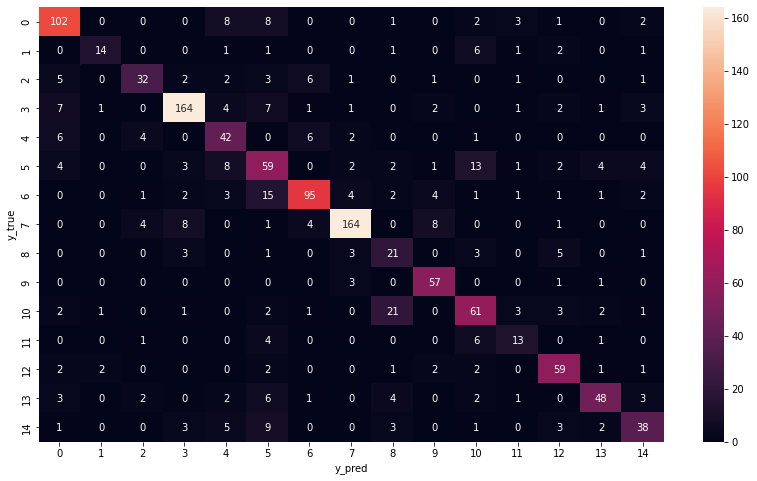

In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))

Classification Report
              precision    recall  f1-score   support

      0Dryoc       0.77      0.80      0.79       127
     10Pycno       0.78      0.52      0.62        27
     11Corvu       0.73      0.59      0.65        54
     12Elanu       0.88      0.85      0.86       194
     13Anthr       0.56      0.69      0.62        61
     14Dicru       0.50      0.57      0.53       103
      1Capri       0.83      0.72      0.77       132
      2Pnoep       0.91      0.86      0.89       190
      3Malac       0.38      0.57      0.45        37
      4Anthi       0.76      0.92      0.83        62
      5Ortho       0.62      0.62      0.62        98
      6Pycno       0.52      0.52      0.52        25
      7Malac       0.74      0.82      0.78        72
      8Malac       0.79      0.67      0.72        72
      9Pachy       0.67      0.58      0.62        65

    accuracy                           0.73      1319
   macro avg       0.70      0.69      0.69      1319
weig

In [ ]:
test_data = ImageDataGenerator(rescale = 1./255)
test_set1 = test_data.flow_from_directory('/content/drive/MyDrive/Birddata_split/melspec8_1/test/',
                                            target_size = (64, 64), batch_size=16, shuffle=False)

Found 1530 images belonging to 15 classes.


96/96 [==============================] - 28s 293ms/step - loss: 1.3957 - accuracy: 0.6928
n Test_Accuracy:- 0.6928104758262634
confusion matrix
[[100   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  59   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  46   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 258   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  80   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 149   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 157   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 205   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  57   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  83   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  96   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  99   0   0]
 [  0   0   0   0   0   0   0   0   0

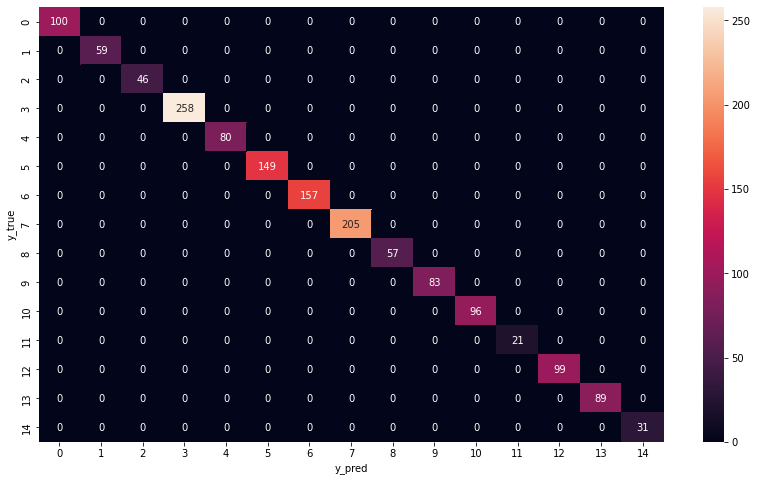

In [ ]:
accuracy = model.evaluate(test_set1)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set1)
y_pred2 = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred2))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(y_true, y_pred2), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Birddata_split/resnet50_mels.hdf5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
